In [23]:
import torch 
import numpy as np
import torch.nn as nn 
import torch.nn.functional as F
import scanpy as sc
import pandas as pd
import loompy as lm
import scipy as scp
import sklearn.neural_network as sknn
# from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import pairwise


from datetime import datetime


import matplotlib.pyplot as plt

In [265]:
class Net(nn.Module):
    def __init__(self,n_input,n_output):
        super(Net,self).__init__()
#         self.layer = layer
        l1, l2, l3, l4 = 60,40,20,10
#         l1, l2 = 10,5
        self.fc1 = nn.Linear(n_input,l1)
        self.fc2 = nn.Linear(l1,l2)
        self.fc3 = nn.Linear(l2,l3)
        self.fc4 = nn.Linear(l3,l4)
        self.fc5 = nn.Linear(l4,n_output)
        self.bn1 = nn.BatchNorm1d(n_input,affine=True)
        self.bn2 = nn.BatchNorm1d(n_output,affine=True)
    def forward(self,x):
        x = self.bn1(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.fc5(x)
        x = self.bn2(x)
        return x
    
class AE(nn.Module):
    def __init__(self,n_input,n_output):
        super(AE,self).__init__()
#         self.layer = layer
        l1, l2, l3, l4 = 60,40,20,10
#         l1, l2 = 10,5
        self.encoder_output_layer = nn.Linear(n_input,l1)
        self.encoder_output_layer = nn.Linear(l1,l2)
        self.decoder_hidden_layer = nn.Linear(l2,l3)
        self.decoder_output_layer = nn.Linear(l3,l4)
        
        self.fc5 = nn.Linear(l4,n_output)
        self.bn1 = nn.BatchNorm1d(n_input,affine=True)
        self.bn2 = nn.BatchNorm1d(n_output,affine=True)
    def forward(self,x):
        x = self.bn1(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.fc5(x)
        x = self.bn2(x)
        return x


In [258]:
def MLPRegress(values,targets,iterations=200):
    
    n_input = sub_pca.shape[1]
    n_output = sub_umap.shape[1]

    net = Net(n_input,n_output)
    optimizer = torch.optim.SGD(net.parameters(),lr=0.001,weight_decay=0.1) #momentum=0.9
    Loss = nn.MSELoss()
    
    losses = []

    for i in range(iterations):
        p = net(values)
    #     print(p.shape)
        loss = Loss(p,targets)
        loss.backward()
        losses.append(loss.item())
    #     if i %1000:
    #         print(loss.item())
        optimizer.step()
    
    return net, losses

In [3]:
pca_feat=np.genfromtxt("Wagner2018_PCA_Embeddings.tsv", delimiter="\t", dtype="double")

umap_feat=np.genfromtxt("Wagner2018_UMAP_Embeddings.tsv", delimiter="\t", dtype="double")

fa2_feat=np.genfromtxt("Wagner2018_FA2_Embeddings.tsv", delimiter="\t", dtype="double")

dm_feat=np.genfromtxt("Wagner2018_DM_Embeddings.tsv", delimiter="\t", dtype="double")

phate_feat=np.genfromtxt("Wagner2018_PHATE_Embeddings.tsv", delimiter="\t", dtype="double")


In [4]:
clust_id=np.genfromtxt("Wagner2018_ClusterID.tsv", delimiter="\t")



In [260]:
torch.tensor(pca_feat)

tensor([[ 1.0459e+01,  2.0160e+00,  3.5937e+00,  ...,  6.7998e-01,
          1.0271e+00,  3.9120e-01],
        [ 7.2892e-01, -2.2928e+00,  7.4169e-01,  ...,  3.4753e-01,
          1.9184e-01,  9.1800e-03],
        [ 1.5276e+00, -2.7377e+00,  7.7092e-01,  ..., -6.0984e-02,
          3.0508e-01, -4.4026e-01],
        ...,
        [-3.5952e+00, -1.2508e+00, -6.8797e-01,  ...,  4.0717e-01,
          6.2803e-01,  5.6830e-01],
        [-2.6687e+00, -5.8930e-01, -2.5527e-01,  ...,  4.9610e-01,
          2.0795e-01,  3.7309e-01],
        [-5.2761e+00, -1.9754e+00, -1.3974e+00,  ..., -3.0199e-01,
          3.2627e-01,  1.1452e+00]], dtype=torch.float64)

In [261]:
# print("Input feat size: {}\nOutput feat size: {}".format(pca_feat.shape,umap_feat.shape))

# type(pca_feat)
# pca_feat=torch.tensor(pca_feat, dtype=torch.float64)

# umap_feat=torch.tensor(umap_feat, dtype=torch.float64)

# fa2_feat=torch.tensor(fa2_feat)

# dm_feat=torch.tensor(dm_feat)

# phate_feat=torch.tensor(phate_feat)


In [262]:
# # A = np.random.normal(0,1,size=(1000,n_input))
# matrix = torch.rand([1000,n_output])

# A = torch.rand([1000,n_input])
# # y = torch.rand([1000,n_output])

# matrix = torch.rand([n_input,n_output])
# y = A.matmul(matrix)

In [373]:
# print(pca_feat.shape)
# print(umap_feat.shape)


# n_sample=5000

# sub_pca = pca_feat[1:n_sample,:]
# sub_umap = umap_feat[1:n_sample,:]

# print(sub_pca.shape)
# print(sub_umap.shape)

(array([ 2679.,  6259.,  3245.,  4614.,  9228., 22830.,  5306.,  2988.,
          340.,  1972.]),
 array([-53476.41972043, -42254.95810494, -31033.49648944, -19812.03487394,
         -8590.57325845,   2630.88835705,  13852.34997254,  25073.81158804,
         36295.27320354,  47516.73481903,  58738.19643453]),
 <BarContainer object of 10 artists>)

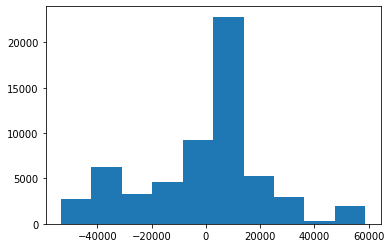

In [412]:
# net, losses = MLPRegress(sub_pca.float(),sub_umap.float(),iterations=1000)
    
# plt.plot(losses)
# plt.show()
hist=np.hstack(fa2_feat[:,1])
plt.hist(hist)

In [8]:
#Define Regressor
Net=sknn.MLPRegressor(hidden_layer_sizes=(100,75,50,25),
                     activation='tanh',
                     solver='adam',
                     learning_rate_init=0.001, 
                     max_iter=1000, verbose=False)

# Define 

In [9]:
def ValidateDataMLPR(Input_Value,Input_Target):
    Net.fit(Input_Value,Input_Target)
    Net.score(Input_Value,Input_Target)
    Input_Target_pred = Net.predict(Input_Value)

    plt.subplot(121)
    plt.scatter(Input_Target[:,0],Input_Target[:,1], 
                s=0.3,
                c=clust_id)
    plt.title('Ground Truth')

    plt.subplot(122)
    plt.scatter(Input_Target_pred[:,0],Input_Target_pred[:,1], 
                s=0.3,
                c=clust_id)
    plt.title('MLPR Predicted')



In [516]:
min(umap_feat[:,1])

-11.744467735290527

In [10]:
scaler=MinMaxScaler(feature_range=(-10,10))

pca_feat_scaled=scaler.fit_transform(pca_feat)
fa2_feat_scaled=scaler.fit_transform(fa2_feat)
phate_feat_scaled=scaler.fit_transform(phate_feat)

# Net.fit(pca_feat,fa2_feat_scaler)

# plt.subplot(121)
# plt.scatter(fa2_feat_scaler[:,0],fa2_feat_scaler[:,1], 
#                 s=0.3,
#                 c=clust_id)

In [11]:
# pca_feat.shape
# fa2_feat.shape
# fa2_feat

#Trains MLPR on full data to see if converges in 
# best(full batch)/worst (no subset) scenario

ValidateDataMLPR(Input_Value, Input_Target)

NameError: name 'Input_Value' is not defined

In [12]:
Input_Value = pca_feat_scaled
Input_Target = fa2_feat_scaled


In [13]:
X_full, X_sub, y_full, y_sub = train_test_split(
    Input_Target, Input_Value, test_size=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X_sub, y_sub, test_size=0.33, random_state=42)

# 

In [14]:
print(type(fa2_feat))
print(type(fa2_feat_scaled))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:

startTime = datetime.now()
Net.fit(X_train,y_train)
y_pred_full = Net.predict(X_full)
fleMLPRTime = datetime.now() - startTime

print(fleMLPRTime)


0:00:33.073915


In [16]:
y_pred1 = Net.predict(X_test)
y_pred2 = Net.predict(X_train)
y_pred_full = Net.predict(X_full)


print("Training score: {}\nTesting score: {}\nFull Set Score: {}".format(
    Net.score(X_train,y_train),
    Net.score(X_test,y_test),
    Net.score(X_full,y_full)))


print("Training size: {}\nTesting size: {}\nFull Set size: {}".format(
    X_train.shape[0],
    X_test.shape[0],
    X_full.shape[0]))

Training score: 0.3608070903747285
Testing score: 0.3349914684156773
Full Set Score: 0.3295389174252573
Training size: 3984
Testing size: 1963
Full Set size: 53514


In [17]:
# Define Qualitative Evaluation Tools

def PlotEmbeddCorr(y_emb,y_pred):
    plt.subplot(121)
    plt.scatter(y_emb[:,0],y_pred[:,0], 
            s=0.3)
    plt.title('1st Feature gt vs pred')

    plt.subplot(122)
    plt.scatter(y_emb[:,1],y_pred[:,1], 
                s=0.3)
    plt.title('2nd Feature gt vs pred')
    
def PlotEmbedd(y_emb,y_pred):
    plt.subplot(121)
    plt.scatter(y_emb[:,0],y_emb[:,1], 
            s=0.3)
    plt.title('Ground Truth')
    
    plt.subplot(122)
    plt.scatter(y_pred[:,0],y_pred[:,1], 
                s=0.3)
    plt.title('MLPR Predicted')

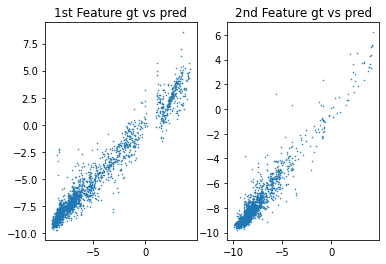

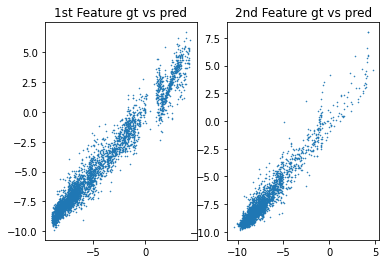

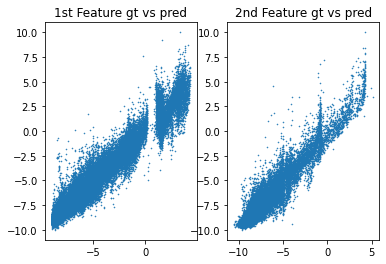

In [18]:
# Test GT vs Test predicted (from Subsample)
plt.figure(1)
p1=PlotEmbeddCorr(y_pred1,y_test)

# Train GT vs Train predicted (from Subsample)
plt.figure(2)
p2=PlotEmbeddCorr(y_pred2,y_train)

# Full Set GT vs Full Set predicted (Full Set)
plt.figure(3)
p3=PlotEmbeddCorr(y_pred_full,y_full)

# plt.show()

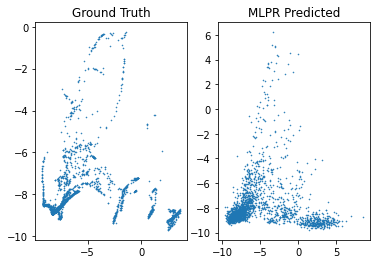

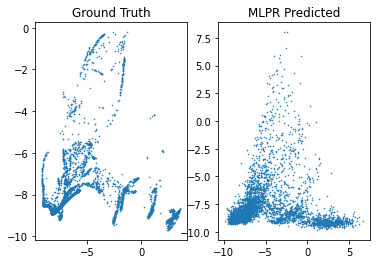

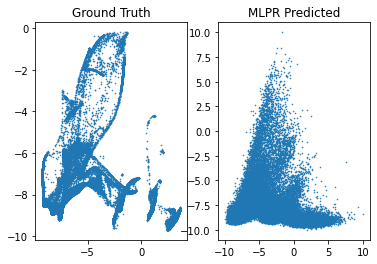

In [510]:
# Test GT vs Test predicted (from Subsample)
plt.figure(1)
p1=PlotEmbedd(y_pred1,y_test)

# Train GT vs Train predicted (from Subsample)
plt.figure(2)
p2=PlotEmbedd(y_pred2,y_train)

# Full Set GT vs Full Set predicted (Full Set)
plt.figure(3)
p3=PlotEmbedd(y_pred_full,y_full)


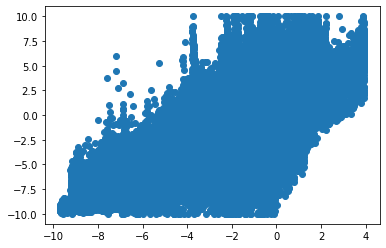

In [522]:
# plt.scatter(y_pred_full,y_full)

In [ ]:

# pairwise.co(y_pred_full,y_full)

scp.stats.spearmanr(y_pred_full.transpose(),y_full.transpose())

